In [ ]:
# Project - Campaign for selling personal loans

In [ ]:
# 1. Read the column description and ensure you understand each attribute well

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
therabank_df=pd.read_csv("G:\Supervised Learning - Project 1\Bank_Personal_Loan_Modelling-1.csv")
therabank_df.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
therabank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
therabank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C650B5A390>,
      dtype=object)

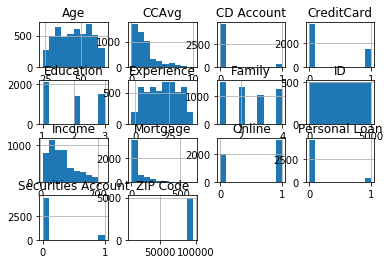

In [17]:
therabank_df.hist()

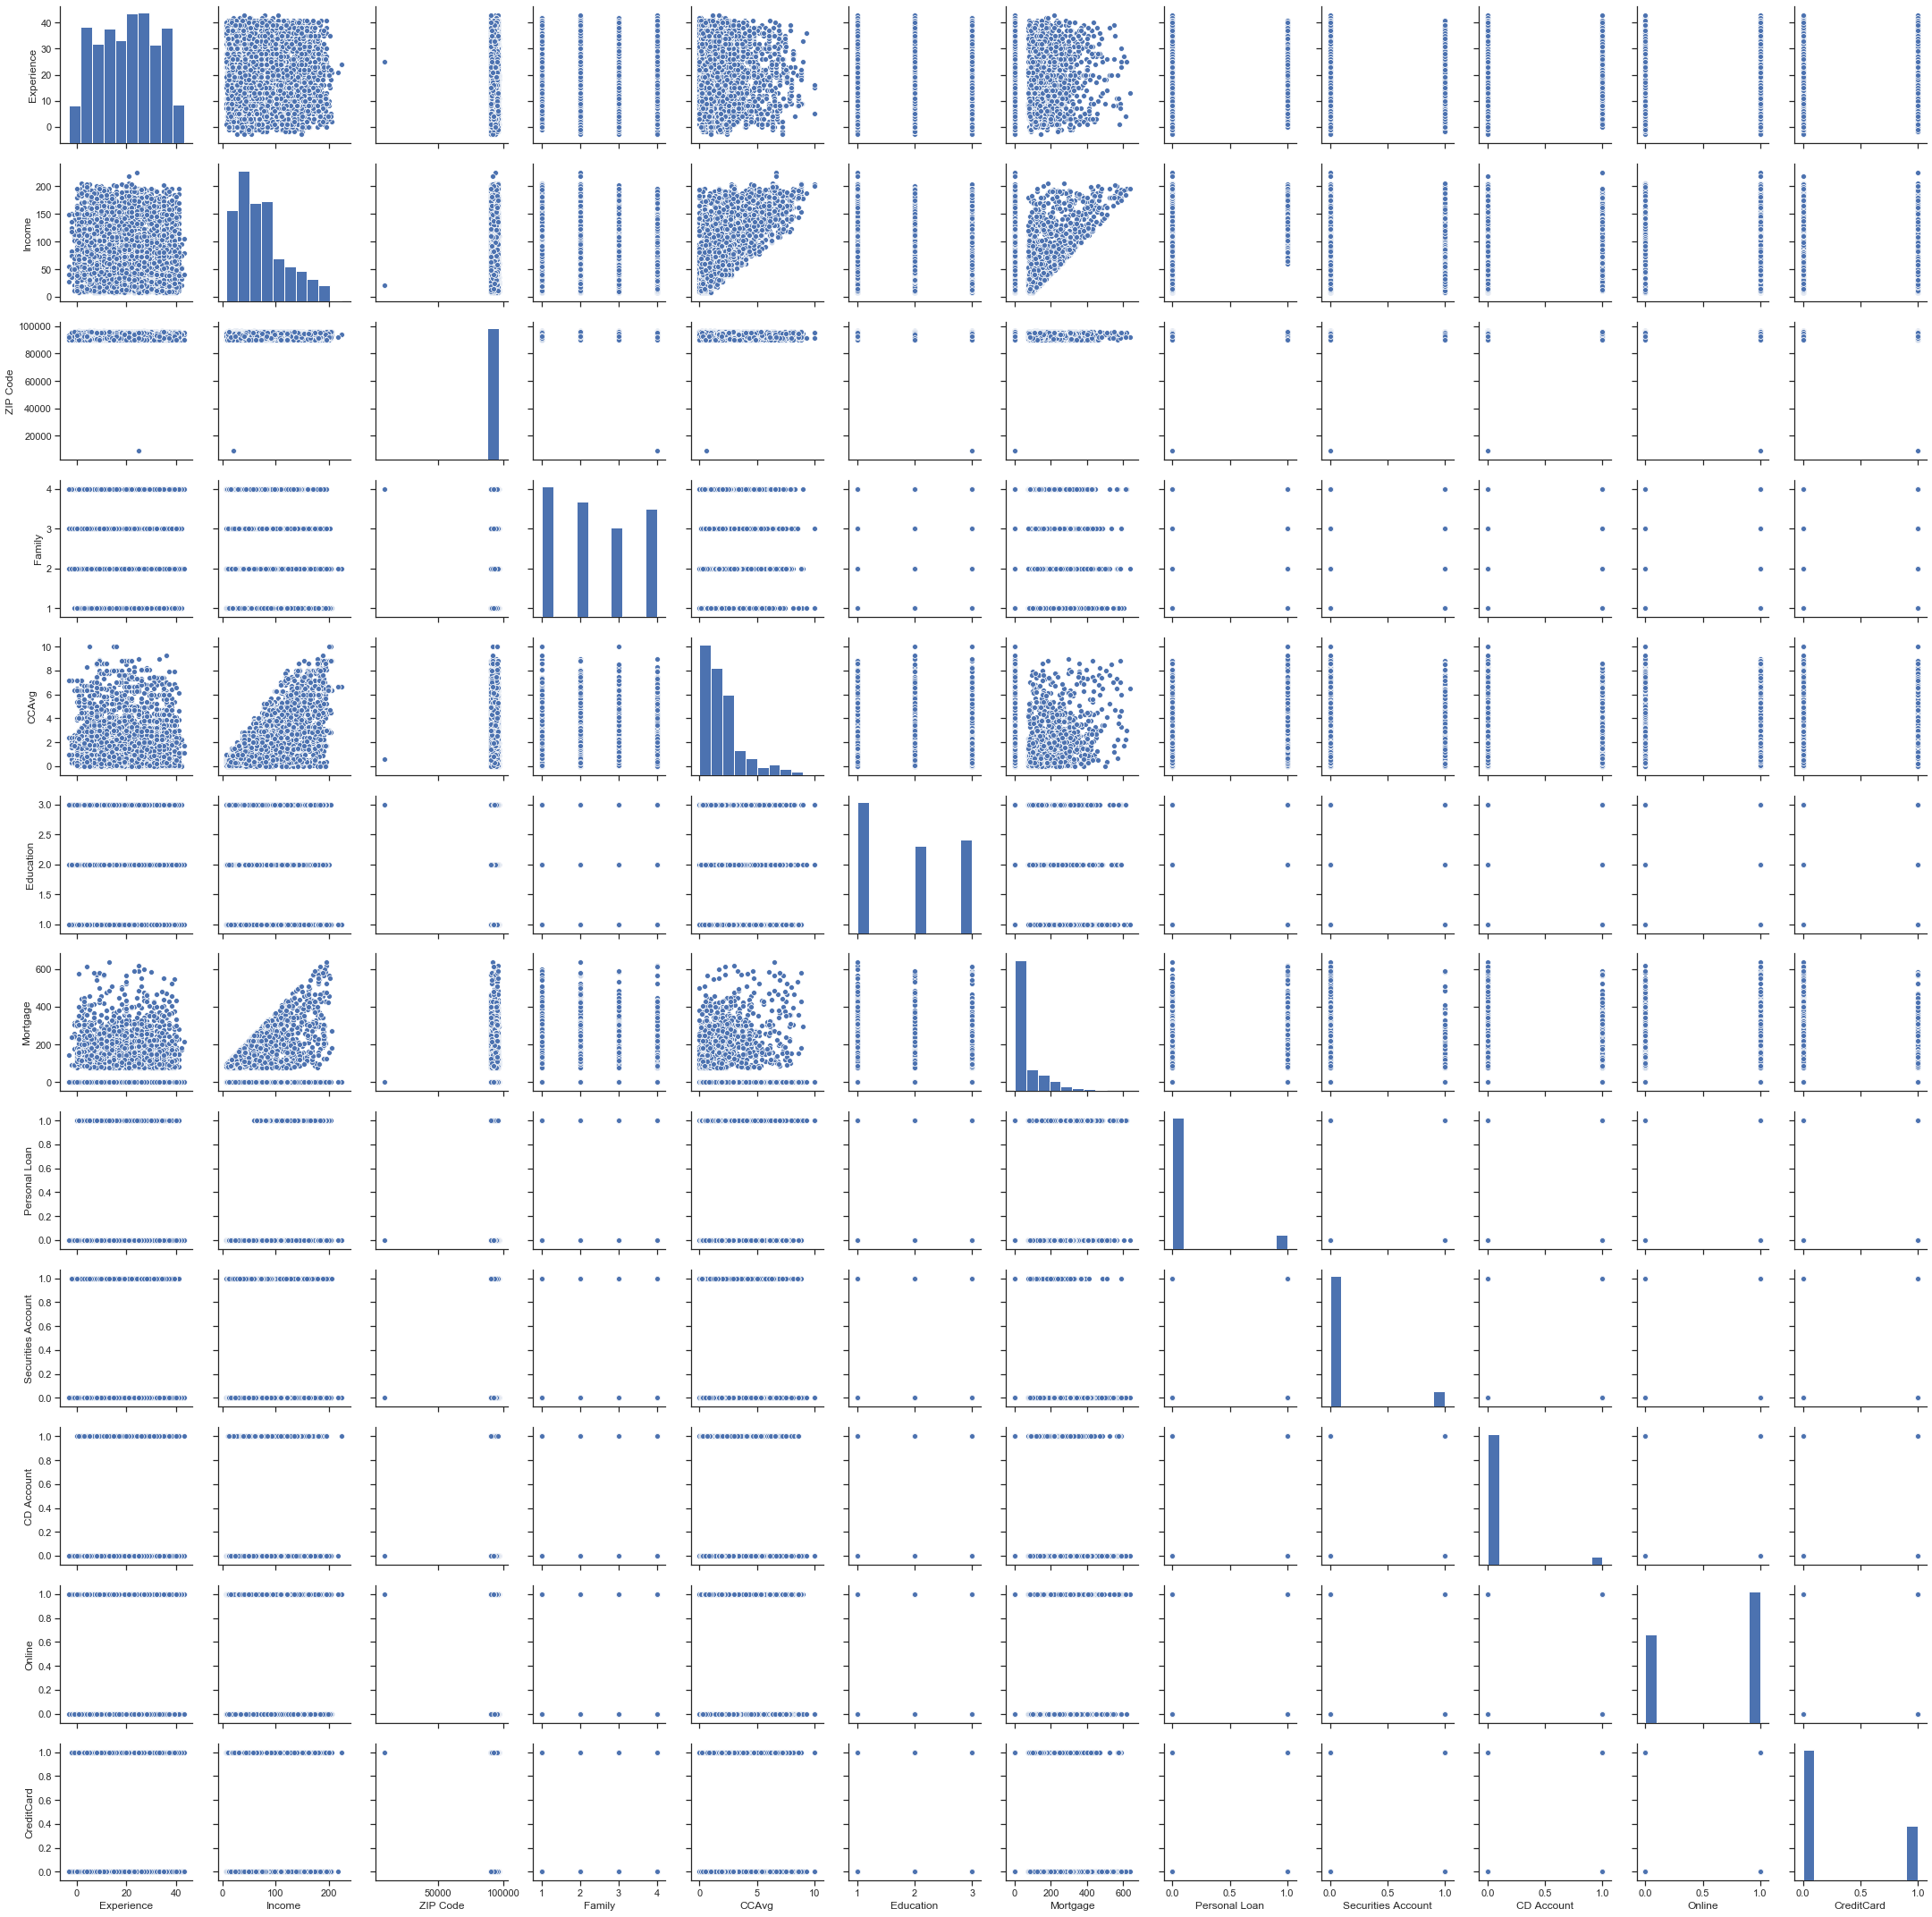

In [29]:
sns.pairplot(therabank_df.iloc[:,2:])

In [ ]:
2. Study the data distribution in each attribute, share your findings.

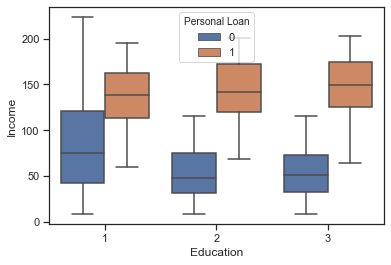

In [36]:
# a) Influence of income and education on personal loan
sns.boxplot(x="Education",y='Income',hue="Personal Loan",data=therabank_df)

In [ ]:
# a) Observation : It seems the customers whose education level is 1 is having more income.
# However customers who has taken the personal loan have the same income levels.

In [ ]:
# b) Influence of Mortgage Loan on Personal Loan and considering education level

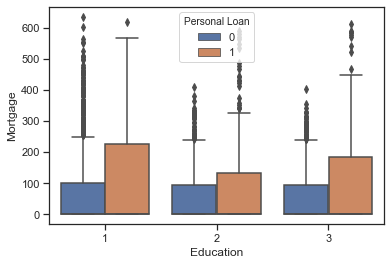

In [39]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=therabank_df)

In [ ]:
# b) Observation: From above chart we can infer that customer who do not have personal loan have less mortgage 
# Customers who have personal loan have high mortgage.

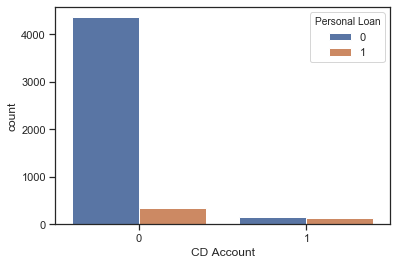

In [46]:
# Influence of CD Account on Personal Loan
sns.countplot(x="CD Account",data=therabank_df,hue="Personal Loan")

In [ ]:
# Observation : From above plot we can infer that customers who do not have CC Account do not have perssonal loan.
# majority of customers fall into this category.
# All customers who have CD Account have Personal Loan.

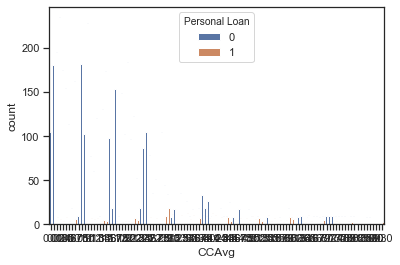

In [49]:
# c) Influence of CC Avg on Personal Loan
sns.countplot(x="CCAvg",data=therabank_df,hue="Personal Loan")

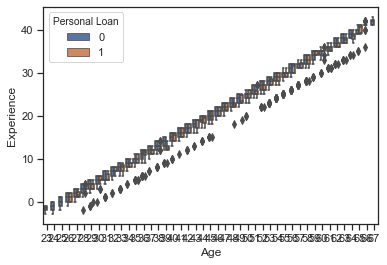

In [50]:
# d) Influence of Age and Experience on Personal Loan
sns.boxplot(x="Age", y='Experience', hue="Personal Loan", data=therabank_df)

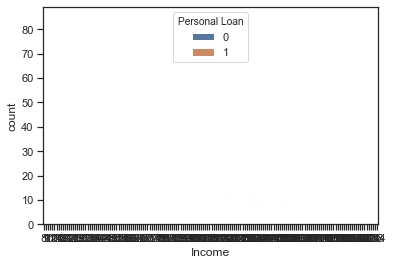

In [53]:
# e) Plot of Income and its distribution
sns.countplot(x="Income",data=therabank_df,hue="Personal Loan")

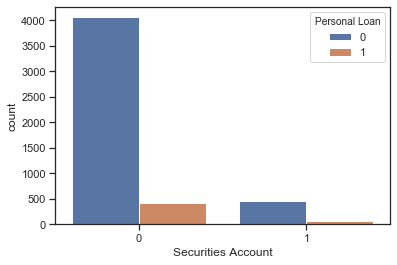

In [56]:
# f) Plot of Securities Account in comparison to Personal Loan
sns.countplot(x="Securities Account", data=therabank_df,hue="Personal Loan")

In [ ]:
# f) Observation:  Majority of customers who does not have loan have securities account.

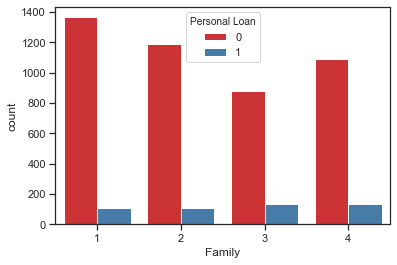

In [58]:
# g) Plot of  Family in relation to Personal Loan
sns.countplot(x='Family',data=therabank_df,hue='Personal Loan',palette='Set1')

In [ ]:
# g) Observation:  Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. 
# When considering future campaign this might be good association.

In [ ]:
#3. Get the target column distribution. 

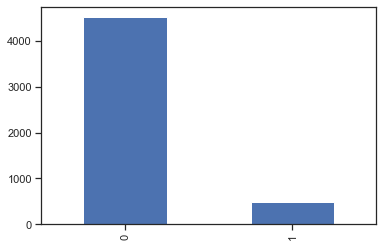

In [51]:
# Target column (Personal Loan) distribution
therabank_df['Personal Loan'].value_counts().plot(kind='bar')

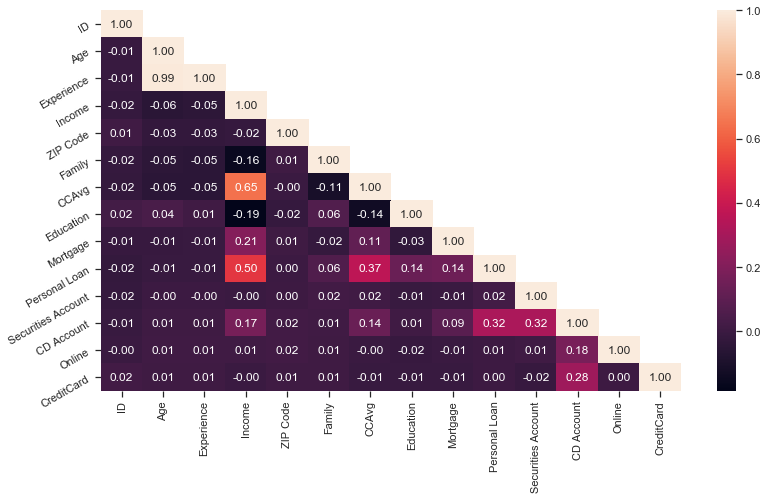

In [61]:
# Correlation of attributes with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = therabank_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [66]:
# 4. Split the data into training and test set in the ratio of 70:30 respectively.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(therabank_df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [70]:
# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

# a) k- NN (k Nearest Neighbours) Model: 
train_set_indep = therabank_df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = therabank_df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)
    


0.9106070713809206


In [71]:
# b) Naive Bayes Model : 
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

In [75]:
# Logistic Regression model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
dt_model.score(test_set , test_labels)

0.9773333333333334

In [92]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(train_set, train_labels)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 6. Print the confusion matrix for all the above models.

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1030    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   3    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [85]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [ ]:
# 7. Give your reasoning on which is the best model in this case and why it performs better? 

In [88]:
X=therabank_df.drop(['Personal Loan','Experience','ID'],axis=1)
y=therabank_df.pop('Personal Loan')

KNN: 0.898600 (0.008902)
NB: 0.885600 (0.010385)


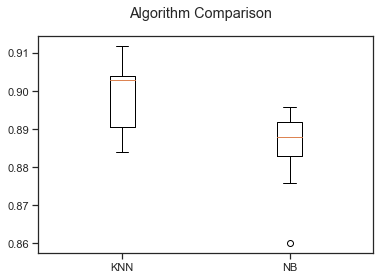

In [91]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
The aim of the universal bank is to convert there liability customers into loan customers. 
They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. 
From the above graph , it seems like k-NN Model have the highest accuracy and we can choose that as our final model.